# Taller 1 - Electiva NLP
# Jairo Iván Ordóñez
Especialización Analítica Estratégica de Datos

Grupo 51


## 1. Instalación de Python (Anaconda)

<img src="./01.Version Python.png">

<img src="./02.Jupyter Notebook.png">

## 2. Creación de Cuenta GitHub

<img src="./03.Cuenta de GitHub.png">

## 3. Obtener Cuenta de Desarrollador Twitter

<img src="./04.Cuenta Desarrollador Twitter.png">

## 4. Contar palabras del Documento de Google

### 4.1. Cargando Datos

In [1]:
#Importación de librerías
import pandas as pd
import collections
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
#Leemos los datos y mostramos los primeros registros
datos = pd.read_csv(r'Taller 1 --- Datos - Sheet1.csv')
datos.head()

,#,Nombre,¿Por qué estás estudiando análitica estratégica de datos?,Sistema Operativo
0,1,Viviana Márquez,"Me gustan mucho las matemáticas, la programaci...",macOSx
1,2,Jorge Gomez,Desarrollo profesional y proyecto personal.,Windows x64
2,3,Ilvar Dario Sanabria,Muchas de las decisiones se basan en datos y c...,Windows x64
3,4,Camilo Rojas,Trabajo con temas relacionados a gestión de in...,Windows x64
4,5,Xiomy Díaz,En mi experiencia en investigación de mercados...,Windows x64


### 4.2 Contando el número de Palabras por estudiante

In [3]:
#Convertimos la Serie en texto y le asignamos el valor de la cantidad de palabras al registro del estudiante:
idx = pd.Index(datos['¿Por qué estás estudiando análitica estratégica de datos?'])
datos['NumPalabras'] = 0
for i in range(len(idx.str.split())):
    datos.NumPalabras[i] = len(idx.str.split()[i])

C:\Jairo.Ordonez\2. Personal\Data Science Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
datos[['Nombre', 'NumPalabras']].sort_values(by='NumPalabras', ascending=False)

,Nombre,NumPalabras
4,Xiomy Díaz,64
10,Arturo Hernández Carvajal,63
19,Duberney Agudelo Delgadillo,56
7,Norma Yuliana Cala Martinez,34
28,Daileny Dorado Delgado,29
3,Camilo Rojas,27
9,Jhonathan Giraldo,27
22,Diego Diaz,27
12,Diana Rodríguez,25
17,Franz Estivens Reyes Lugo,25


In [5]:
#Concatenamos todas las palabras que están dentro del campo donde se indica la razón por la que se está estudiando
#Analítica Estratégica de Datos y lo dejamos todo dentro de la variable texto
texto = " ".join(razon for razon in datos['¿Por qué estás estudiando análitica estratégica de datos?'])

In [6]:
print ("Existen {} palabras en las razones por la que decidieron estudiar Analítica Estratégica de Datos".format(len(texto)))

Existen 4308 palabras en las razones por la que decidieron estudiar Analítica Estratégica de Datos


### 4.3 Palabra más utilizada

In [7]:
#Descargamso las palabras de conexión o StopWords para que no nos aparezca estas palabras dentro del conteo 
nltk.download('stopwords')
palabras_conexion = set(stopwords.words('spanish'))

#Eliminamos de nuestra lista, las palabras conexión
palabrasLimpias = [palabra for palabra in texto.lower().split() if not palabra in palabras_conexion]

#Transformamos a lista y contamos la cantidad de ocurrencias por palabra
palabras = collections.Counter(list(palabrasLimpias))

#Luego, lo pasamos a un DataFrame:
dfPalabras = pd.DataFrame(palabras.most_common(20),
                         columns=['palabra','cantidad'])

palabras.most_common(15)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eordjai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('datos', 14),
 ('aprender', 10),
 ('profesional', 7),
 ('herramientas', 7),
 ('decisiones', 6),
 ('valor', 6),
 ('información', 5),
 ('quiero', 5),
 ('gusta', 5),
 ('personal', 4),
 ('trabajo', 4),
 ('toma', 4),
 ('analitica', 4),
 ('creo', 3),
 ('temas', 3)]

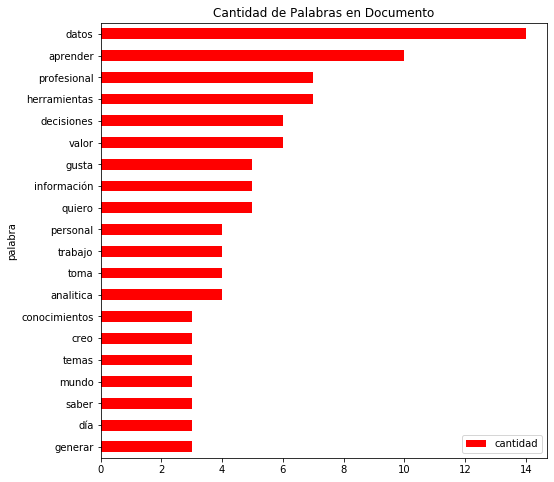

In [8]:
#Ahora, imprimamos en un Plot de Barras el resultado de las palabras más comunes
fig, ax = plt.subplots(figsize=(8, 8))

dfPalabras.sort_values(by='cantidad').plot.barh(x='palabra',
                      y='cantidad',
                      ax=ax,
                      color="red")

ax.set_title("Cantidad de Palabras en Documento")

plt.show()

El resultado nos muestra que la palabra más común en los comentarios del documento, es la palabra __datos__